In [79]:
import pandas as pd
import numpy as np
df = pd.read_excel('tips.xlsx', sheet_name='1___Data')



In [131]:
import matplotlib.pyplot as plt
plt.xkcd()
pd.options.display.max_columns = 300

In [144]:
import rq
import pandas_profiling

In [158]:
pandas_profiling.ProfileReport( df )

ValueError: cannot convert float NaN to integer

In [82]:
def _get_RF_earnings(grp):
    g = grp.copy()
    odds_guess = (g['RF_WIN_PROBS'] == g['RF_WIN_PROBS'].max())
    g['RF_EARNINGS'] = odds_guess * g['DOLLAR_RETURN_WIN']
    return g

def _get_LG_earnings(grp):
    g = grp.copy()
    odds_guess = (g['LG_WIN_PROBS'] == g['LG_WIN_PROBS'].max())
    g['LG_EARNINGS'] = odds_guess * g['DOLLAR_RETURN_WIN']
    return g

def calculate_returns_per_dollar(winning_odds, placing_odds, rank):
    rank = pd.Series(rank)
    winning = (rank == 1) * (winning_odds/10 - 1)
    placed = rank.isin([2,3]) * (placing_odds/10 - 1)
    losing = (rank > 3)
    return winning + placed - losing

def calculate_returns_per_dollar_win(winning_odds, placing_odds, rank):
    rank = pd.Series(rank)
    winning = (rank == 1) * (winning_odds/10 - 1)
    placed = rank.isin([2,3]) * (placing_odds/10 - 1)
    losing = (rank > 1)
    return winning - losing

def _get_odds_earnings(grp):
    g = grp.copy()
    odds_guess = (g['N_CLOSING_ODDS'] == g['N_CLOSING_ODDS'].min())
    g['ODDS_EARNINGS'] = odds_guess * g['DOLLAR_RETURN_WIN']
    return g

def _get_tips_earnings(grp):
    g = grp.copy()
    odds_guess = (g['RACE_DAY_TIPS_INDEX'] == g['RACE_DAY_TIPS_INDEX'].min())
    g['TIPS_EARNINGS'] = odds_guess * g['DOLLAR_RETURN_WIN']
    return g

def _get_model_earnings_RF(grp, colname, prob_col):
    g = grp.copy()
    model_guess = (g['RF_WIN_PROBS'] == g['RF_WIN_PROBS'].max( ))
    g[colname] = model_guess * g['DOLLAR_RETURN_WIN']
    return g

def _get_model_earnings_LG(grp, colname, prob_col):
    g = grp.copy()
    model_guess = (g['LG_WIN_PROBS'] == g['LG_WIN_PROBS'].max( ))
    g[colname] = model_guess * g['DOLLAR_RETURN_WIN']
    return g

# Odds/Tips payouts

In [83]:
df_new = df.copy()

In [84]:
df_new['N_PLACE_CLOSING_ODDS'] = df_new.apply(lambda row: (row['N_CLOSING_ODDS'] / 2) if np.isnan(row['N_PLACE_CLOSING_ODDS']) else row['N_PLACE_CLOSING_ODDS'],axis=1)
df_new['ODDS_PROB'] = (10/((df_new['N_CLOSING_ODDS'])-1))
df_new['PAY_ODDS'] = df_new['N_CLOSING_ODDS']/1.24
df_new['PAY_PLACE_ODDS'] = df_new['N_PLACE_CLOSING_ODDS']/1.24
df_new['DOLLAR_RETURN'] = rq.calculate_returns_per_dollar(df_new['PAY_ODDS'], df_new['PAY_PLACE_ODDS'], df_new['RANK'])
df_new['DOLLAR_RETURN_WIN'] = calculate_returns_per_dollar_win(df_new['PAY_ODDS'], df_new['PAY_PLACE_ODDS'], df_new['RANK'])
df_new['TIPS'] = df_new['RACE_DAY_TIPS_INDEX']


In [85]:
df_new['RACE_ID'] = df_new['RACE_DATE'].apply(lambda x: str(x)) + df_new['RACENO'].apply(lambda x: str(x))

In [86]:
df_new['TIPS'] = df_new['RACE_DAY_TIPS_INDEX']
rq._get_tips_earnings(df_new[(df_new['RACE_DATE']=='15-Jul-2020') & (df_new['RACENO']==2)])

,RACE_DATE,RACENO,HORSENO_IN_RACE,HORSE,N_CLOSING_ODDS,N_PLACE_CLOSING_ODDS,RANK,N_LENGTHS_BEHIND_WINNER,INITIAL_TIPS_INDEX,NORMALIZED_PROB_INITIAL_TIPS_INDEX,RANK_INITIAL_TIPS_INDEX,RANK_1_INITIAL_TIPS_INDEX,RANK_2_INITIAL_TIPS_INDEX,RANK_3_INITIAL_TIPS_INDEX,RANK_4_INITIAL_TIPS_INDEX,RANK_5_INITIAL_TIPS_INDEX,RANK_6_INITIAL_TIPS_INDEX,RANK_7_INITIAL_TIPS_INDEX,RANK_8_INITIAL_TIPS_INDEX,BAND_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_1_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_2_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_3_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_45_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_67_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_89_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_INITIAL_TIPS_INDEX,RACE_DAY_TIPS_INDEX,NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_RACE_DAY_TIPS_INDEX,RANK_1_RACE_DAY_TIPS_INDEX,RANK_2_RACE_DAY_TIPS_INDEX,RANK_3_RACE_DAY_TIPS_INDEX,RANK_4_RACE_DAY_TIPS_INDEX,RANK_5_RACE_DAY_TIPS_INDEX,RANK_6_RACE_DAY_TIPS_INDEX,RANK_7_RACE_DAY_TIPS_INDEX,RANK_8_RACE_DAY_TIPS_INDEX,BAND_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_1_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_2_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_3_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_45_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_67_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_89_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_1,PLACE_FLAG,WIN_FLAG,ODDS_PROB,PAY_ODDS,PAY_PLACE_ODDS,DOLLAR_RETURN,DOLLAR_RETURN_WIN,TIPS,RACE_ID,TIPS_EARNINGS
12,2020-07-15,2,1,I'M THE CONQUIST,190,62.5,11,3.75,57.1,0.0173,9,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,1,22.0,0.0449,7,0,0,0,0,0,0,1,0,12,0,0,0,0,0,0,1,0,11,0,0,0.052910,153.225806,50.403226,-1.000000,-1.000000,22.0,2020-07-15 00:00:002,-0.0
13,2020-07-15,2,2,APOLLOS BOW,330,91.0,9,2.25,74.2,0.0133,9,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,1,99.0,0.0100,9,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,9,0,0,0.030395,266.129032,73.387097,-1.000000,-1.000000,99.0,2020-07-15 00:00:002,-0.0
14,2020-07-15,2,3,VITAL SPRING,73,23.0,4,0.50,11.1,0.0890,4,0,0,0,1,0,0,0,0,9,0,0,0,0,0,1,0,0,9.3,0.1062,4,0,0,0,1,0,0,0,0,8,0,0,0,0,0,1,0,0,4,0,0,0.138889,58.870968,18.548387,-1.000000,-1.000000,9.3,2020-07-15 00:00:002,-0.0
15,2020-07-15,2,4,OVERSUBSCRIBED,51,20.0,1,-0.13,4.6,0.2147,1,1,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,5.4,0.1829,2,0,1,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,1,1,1,0.200000,41.129032,16.129032,3.112903,3.112903,5.4,2020-07-15 00:00:002,0.0
16,2020-07-15,2,5,CHUNGHWA JINGSHEN,110,36.0,2,0.13,13.5,0.0732,5,0,0,0,0,1,0,0,0,10,0,0,0,0,0,0,1,0,17.5,0.0565,6,0,0,0,0,0,1,0,0,11,0,0,0,0,0,0,1,0,2,1,0,0.091743,88.709677,29.032258,1.903226,-1.000000,17.5,2020-07-15 00:00:002,0.0
17,2020-07-15,2,6,LA BOMBA,47,16.5,5,1.25,4.8,0.2058,2,0,1,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,4.4,0.2245,1,1,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,5,0,0,0.217391,37.903226,13.306452,-1.000000,-1.000000,4.4,2020-07-15 00:00:002,-1.0
18,2020-07-15,2,7,FAIRY FLOSS,97,33.0,7,2.00,74.2,0.0133,9,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,1,47.7,0.0207,9,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,1,7,0,0,0.104167,78.225806,26.612903,-1.000000,-1.000000,47.7,2020-07-15 00:00:002,-0.0
19,2020-07-15,2,8,FLYING MONKEY,45,17.5,8,2.25,5.4,0.1829,3,0,0,1,0,0,0,0,0,4,0,0,0,1,0,0,0,0,5.5,0.1796,3,0,0,1,0,0,0,0,0,5,0,0,0,1,0,0,0,0,8,0,0,0.227273,36.290323,14.112903,-1.000000,-1.000000,5.5,2020-07-15 00:00:002,-0.0
20,2020-07-15,2,9,SHOW MISSION,300,77.0,3,0.50,13.8,0.0716,6,0,0,0,0,0,1,0,0,10,0,0,0,0,0,0,1,0,25.8,0.0383,8,0,0,0,0,0,0,0,1,13,0,0,0,0,0,0,0,1,3,1,0,0.033445,241.935484,62.096774,5.209677,-1.000000,25.8,2020-07-15 00:00:002,0.0
21,2020-07-15,2,10,JIMSON THE DRAGON,250,58.0,6,2.00,22.3,0.0443,8,0,0,0,0,0,0,0,1,12,0,0,0,0,0,0,1,0,27.0,0.0366,9,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,1,6,0,0,0.040161,201.612903,46.774194,-1.000000,-1.000000,27.0,2020-07-15 00:00:002,-0.0


# T/T split

In [87]:
y = df_new['WIN_FLAG'].copy()

In [88]:
from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7).split(df_new, y, groups=df_new['RACE_DATE']))
train_x = df_new.iloc[train_inds]
test_x = df_new.iloc[test_inds]
train_y = y.iloc[train_inds]
test_y = y.iloc[test_inds]

# Tips Random Forest

In [ ]:
train_x

In [89]:
X_train_rf = train_x.drop(['RACE_DATE', 'RACENO', 'HORSENO_IN_RACE', 'HORSE', 'N_CLOSING_ODDS', 'N_PLACE_CLOSING_ODDS',\
           'RANK', 'N_LENGTHS_BEHIND_WINNER', 'RANK_1', 'PLACE_FLAG', 'WIN_FLAG',
             'ODDS_PROB', 'PAY_ODDS', 'PAY_PLACE_ODDS',
             'DOLLAR_RETURN', 'TIPS', 'RACE_ID', 'DOLLAR_RETURN_WIN'], axis=1).copy()
X_test_rf = test_x.drop(['RACE_DATE', 'RACENO', 'HORSENO_IN_RACE', 'HORSE', 'N_CLOSING_ODDS', 'N_PLACE_CLOSING_ODDS',\
           'RANK', 'N_LENGTHS_BEHIND_WINNER', 'RANK_1', 'PLACE_FLAG', 'WIN_FLAG',
             'ODDS_PROB', 'PAY_ODDS', 'PAY_PLACE_ODDS',
             'DOLLAR_RETURN', 'TIPS', 'RACE_ID', 'DOLLAR_RETURN_WIN'], axis=1).copy()

In [18]:
X_train_rf.head()

,INITIAL_TIPS_INDEX,NORMALIZED_PROB_INITIAL_TIPS_INDEX,RANK_INITIAL_TIPS_INDEX,RANK_1_INITIAL_TIPS_INDEX,RANK_2_INITIAL_TIPS_INDEX,RANK_3_INITIAL_TIPS_INDEX,RANK_4_INITIAL_TIPS_INDEX,RANK_5_INITIAL_TIPS_INDEX,RANK_6_INITIAL_TIPS_INDEX,RANK_7_INITIAL_TIPS_INDEX,RANK_8_INITIAL_TIPS_INDEX,BAND_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_1_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_2_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_3_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_45_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_67_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_89_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_INITIAL_TIPS_INDEX,RACE_DAY_TIPS_INDEX,NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_RACE_DAY_TIPS_INDEX,RANK_1_RACE_DAY_TIPS_INDEX,RANK_2_RACE_DAY_TIPS_INDEX,RANK_3_RACE_DAY_TIPS_INDEX,RANK_4_RACE_DAY_TIPS_INDEX,RANK_5_RACE_DAY_TIPS_INDEX,RANK_6_RACE_DAY_TIPS_INDEX,RANK_7_RACE_DAY_TIPS_INDEX,RANK_8_RACE_DAY_TIPS_INDEX,BAND_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_1_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_2_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_3_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_45_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_67_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_89_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX
0,28.5,0.0340,6,0,0,0,0,0,1,0,0,13,0,0,0,0,0,0,0,1,18.9,0.0512,4,0,0,0,1,0,0,0,0,12,0,0,0,0,0,0,1,0
1,2.5,0.3878,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2.9,0.3334,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,14.0,0.0692,4,0,0,0,1,0,0,0,0,10,0,0,0,0,0,0,1,0,20.6,0.0469,5,0,0,0,0,1,0,0,0,12,0,0,0,0,0,0,1,0
3,22.3,0.0435,5,0,0,0,0,1,0,0,0,12,0,0,0,0,0,0,1,0,37.1,0.0261,6,0,0,0,0,0,1,0,0,15,0,0,0,0,0,0,0,1
4,99.0,0.0098,9,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,99.0,0.0098,9,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0


In [90]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(class_weight='balanced')

In [91]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
k5s = StratifiedKFold(n_splits=5, shuffle = False)

In [92]:
grid_para_forest = [{
    "max_depth": range(2, 4),
    "n_estimators": [10, 25, 50],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(2, 5),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [0]}]

grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring= 'f1', cv=k5s, n_jobs=-1)

In [94]:
grid_search_forest.fit(X_train_rf, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 4),
                          'min_samples_leaf': range(2, 5),
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                          'n_estimators': [10, 25, 50], 'random_state': [0]}],
             scoring='f1')

In [95]:
grid_search_forest.score(X_train_rf, train_y)

0.260650254948188

In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, grid_search_forest.best_estimator_.predict(X_test_rf))

array([[5894, 3116],
       [ 221,  580]])

In [96]:
grid_search_forest.best_estimator_.score(X_test_rf, test_y)

0.6598715727244929

In [97]:
probs = grid_search_forest.best_estimator_.predict_proba(X_test_rf)
probs1=probs[:,1]

In [98]:
test_x['RF_WIN_PROBS'] = probs1

/Users/Brancusi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
test_x.head()

,RACE_DATE,RACENO,HORSENO_IN_RACE,HORSE,N_CLOSING_ODDS,N_PLACE_CLOSING_ODDS,RANK,N_LENGTHS_BEHIND_WINNER,INITIAL_TIPS_INDEX,NORMALIZED_PROB_INITIAL_TIPS_INDEX,RANK_INITIAL_TIPS_INDEX,RANK_1_INITIAL_TIPS_INDEX,RANK_2_INITIAL_TIPS_INDEX,RANK_3_INITIAL_TIPS_INDEX,RANK_4_INITIAL_TIPS_INDEX,RANK_5_INITIAL_TIPS_INDEX,RANK_6_INITIAL_TIPS_INDEX,RANK_7_INITIAL_TIPS_INDEX,RANK_8_INITIAL_TIPS_INDEX,BAND_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_1_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_2_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_3_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_45_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_67_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_89_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_INITIAL_TIPS_INDEX,RACE_DAY_TIPS_INDEX,NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_RACE_DAY_TIPS_INDEX,RANK_1_RACE_DAY_TIPS_INDEX,RANK_2_RACE_DAY_TIPS_INDEX,RANK_3_RACE_DAY_TIPS_INDEX,RANK_4_RACE_DAY_TIPS_INDEX,RANK_5_RACE_DAY_TIPS_INDEX,RANK_6_RACE_DAY_TIPS_INDEX,RANK_7_RACE_DAY_TIPS_INDEX,RANK_8_RACE_DAY_TIPS_INDEX,BAND_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_1_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_2_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_3_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_45_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_67_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_89_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_1,PLACE_FLAG,WIN_FLAG,ODDS_PROB,PAY_ODDS,PAY_PLACE_ODDS,DOLLAR_RETURN,DOLLAR_RETURN_WIN,TIPS,RACE_ID,RF_WIN_PROBS
251,2020-07-08,1,2,GREEN ENVY,80,29.5,9,8.00,5.6,0.1782,3,0,0,1,0,0,0,0,0,5,0,0,0,1,0,0,0,0,7.3,0.1416,3,0,0,1,0,0,0,0,0,6,0,0,0,0,1,0,0,0,9,0,0,0.126582,64.516129,23.790323,-1.000000,-1.000000,7.3,2020-07-08 00:00:001,0.600068
252,2020-07-08,1,3,HAPPY ICHIBAN,67,26.5,1,-1.75,39.5,0.0253,8,0,0,0,0,0,0,0,1,15,0,0,0,0,0,0,0,1,34.8,0.0297,8,0,0,0,0,0,0,0,1,14,0,0,0,0,0,0,0,1,1,1,1,0.151515,54.032258,21.370968,4.403226,4.403226,34.8,2020-07-08 00:00:001,0.318011
253,2020-07-08,1,4,HAPPY HOUR,170,52.0,10,8.25,22.2,0.0449,7,0,0,0,0,0,0,1,0,12,0,0,0,0,0,0,1,0,14.0,0.0738,7,0,0,0,0,0,0,1,0,10,0,0,0,0,0,0,1,0,10,0,0,0.059172,137.096774,41.935484,-1.000000,-1.000000,14.0,2020-07-08 00:00:001,0.466713
254,2020-07-08,1,5,DASHING GRACE,1440,294.5,11,21.25,99.0,0.0101,9,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,99.0,0.0104,9,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,11,0,0,0.006949,1161.290323,237.500000,-1.000000,-1.000000,99.0,2020-07-08 00:00:001,0.204317
255,2020-07-08,1,6,GOLDEN GENERAL,110,34.0,7,5.75,13.6,0.0734,6,0,0,0,0,0,1,0,0,10,0,0,0,0,0,0,1,0,11.7,0.0883,6,0,0,0,0,0,1,0,0,9,0,0,0,0,0,1,0,0,7,0,0,0.091743,88.709677,27.419355,-1.000000,-1.000000,11.7,2020-07-08 00:00:001,0.504759


# Logistic Regression

In [100]:
drop_col = ['RACE_DATE', 'RACENO', 'HORSENO_IN_RACE', 'HORSE', 'N_CLOSING_ODDS', 'N_PLACE_CLOSING_ODDS',
           'RANK', 'N_LENGTHS_BEHIND_WINNER', 'RANK_1_INITIAL_TIPS_INDEX',
       'RANK_2_INITIAL_TIPS_INDEX', 'RANK_3_INITIAL_TIPS_INDEX',
       'RANK_4_INITIAL_TIPS_INDEX', 'RANK_5_INITIAL_TIPS_INDEX',
       'RANK_6_INITIAL_TIPS_INDEX', 'RANK_7_INITIAL_TIPS_INDEX',
       'RANK_8_INITIAL_TIPS_INDEX', 'BAND_1_NORMALIZED_PROB_INITIAL_TIPS_INDEX',
       'BAND_2_NORMALIZED_PROB_INITIAL_TIPS_INDEX',
       'BAND_3_NORMALIZED_PROB_INITIAL_TIPS_INDEX',
       'BAND_45_NORMALIZED_PROB_INITIAL_TIPS_INDEX',
       'BAND_67_NORMALIZED_PROB_INITIAL_TIPS_INDEX',
       'BAND_89_NORMALIZED_PROB_INITIAL_TIPS_INDEX',
       'BAND_101112_NORMALIZED_PROB_INITIAL_TIPS_INDEX',
       'BAND_13141516_NORMALIZED_PROB_INITIAL_TIPS_INDEX',
           'RANK_1_RACE_DAY_TIPS_INDEX',
       'RANK_2_RACE_DAY_TIPS_INDEX', 'RANK_3_RACE_DAY_TIPS_INDEX',
       'RANK_4_RACE_DAY_TIPS_INDEX', 'RANK_5_RACE_DAY_TIPS_INDEX',
       'RANK_6_RACE_DAY_TIPS_INDEX', 'RANK_7_RACE_DAY_TIPS_INDEX',
       'RANK_8_RACE_DAY_TIPS_INDEX','BAND_1_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX',
       'BAND_2_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX',
       'BAND_3_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX',
       'BAND_45_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX',
       'BAND_67_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX',
       'BAND_89_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX',
       'BAND_101112_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX',
       'BAND_13141516_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX', 'RANK_1',
       'PLACE_FLAG', 'WIN_FLAG',
             'ODDS_PROB', 'PAY_ODDS', 'PAY_PLACE_ODDS',
             'DOLLAR_RETURN', 'TIPS', 'RACE_ID', 'DOLLAR_RETURN_WIN']


In [178]:
train_x

,RACE_DATE,RACENO,HORSENO_IN_RACE,HORSE,N_CLOSING_ODDS,N_PLACE_CLOSING_ODDS,RANK,N_LENGTHS_BEHIND_WINNER,INITIAL_TIPS_INDEX,NORMALIZED_PROB_INITIAL_TIPS_INDEX,RANK_INITIAL_TIPS_INDEX,RANK_1_INITIAL_TIPS_INDEX,RANK_2_INITIAL_TIPS_INDEX,RANK_3_INITIAL_TIPS_INDEX,RANK_4_INITIAL_TIPS_INDEX,RANK_5_INITIAL_TIPS_INDEX,RANK_6_INITIAL_TIPS_INDEX,RANK_7_INITIAL_TIPS_INDEX,RANK_8_INITIAL_TIPS_INDEX,BAND_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_1_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_2_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_3_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_45_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_67_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_89_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_INITIAL_TIPS_INDEX,RACE_DAY_TIPS_INDEX,NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_RACE_DAY_TIPS_INDEX,RANK_1_RACE_DAY_TIPS_INDEX,RANK_2_RACE_DAY_TIPS_INDEX,RANK_3_RACE_DAY_TIPS_INDEX,RANK_4_RACE_DAY_TIPS_INDEX,RANK_5_RACE_DAY_TIPS_INDEX,RANK_6_RACE_DAY_TIPS_INDEX,RANK_7_RACE_DAY_TIPS_INDEX,RANK_8_RACE_DAY_TIPS_INDEX,BAND_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_1_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_2_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_3_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_45_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_67_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_89_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_1,PLACE_FLAG,WIN_FLAG,ODDS_PROB,PAY_ODDS,PAY_PLACE_ODDS,DOLLAR_RETURN,DOLLAR_RETURN_WIN,TIPS,RACE_ID
0,2020-07-15,1,1,POLYMER LUCK,130,34.0,11,4.50,28.5,0.0340,6,0,0,0,0,0,1,0,0,13,0,0,0,0,0,0,0,1,18.9,0.0512,4,0,0,0,1,0,0,0,0,12,0,0,0,0,0,0,1,0,11,0,0,0.077519,104.838710,27.419355,-1.000000,-1.0,18.9,2020-07-15 00:00:001
1,2020-07-15,1,2,BUNDLE OF ENERGY,37,15.0,2,0.08,2.5,0.3878,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2.9,0.3334,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,1,0,0.277778,29.838710,12.096774,0.209677,-1.0,2.9,2020-07-15 00:00:001
2,2020-07-15,1,3,HAY RUN,100,35.5,4,1.75,14.0,0.0692,4,0,0,0,1,0,0,0,0,10,0,0,0,0,0,0,1,0,20.6,0.0469,5,0,0,0,0,1,0,0,0,12,0,0,0,0,0,0,1,0,4,0,0,0.101010,80.645161,28.629032,-1.000000,-1.0,20.6,2020-07-15 00:00:001
3,2020-07-15,1,4,BABY STORM,100,34.0,3,1.25,22.3,0.0435,5,0,0,0,0,1,0,0,0,12,0,0,0,0,0,0,1,0,37.1,0.0261,6,0,0,0,0,0,1,0,0,15,0,0,0,0,0,0,0,1,3,1,0,0.101010,80.645161,27.419355,1.741935,-1.0,37.1,2020-07-15 00:00:001
4,2020-07-15,1,5,JOY N FUN LEGEND,470,125.5,12,5.00,99.0,0.0098,9,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,99.0,0.0098,9,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,12,0,0,0.021322,379.032258,101.209677,-1.000000,-1.0,99.0,2020-07-15 00:00:001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49221,2015-09-06,10,10,SUPREME FLIGHT,400,200.0,6,3.00,99.0,0.0094,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,99.0,0.0095,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,6,0,0,0.025063,322.580645,161.290323,-1.000000,-1.0,99.0,2015-09-06 00:00:0010
49222,2015-09-06,10,11,SUPREME FRESH,440,220.0,8,4.00,99.0,0.0094,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,99.0,0.0095,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,8,0,0,0.022779,354.838710,177.419355,-1.000000,-1.0,99.0,2015-09-06 00:00:0010
49223,2015-09-06,10,12,IMPERIAL CONCORDE,1670,835.0,10,5.50,99.0,0.0094,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,99.0,0.0095,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,10,0,0,0.005992,1346.774194,673.387097,-1.000000,-1.0,99.0,2015-09-06 00:00:0010
49224,2015-09-06,10,13,KYNAM,380,190.0,7,3.00,99.0,0.0094,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,84.2,0.0111,7,0,0,0,0,0,0,1,0,18,0,0,0,0,0,0,0,0,7,0,0,0.026385,306.451613,153.225806,-1.000000,-1.0,84.2,2015-09-06 00:00:0010


In [101]:
train_x.drop(drop_col, axis=1).copy()

,INITIAL_TIPS_INDEX,NORMALIZED_PROB_INITIAL_TIPS_INDEX,RANK_INITIAL_TIPS_INDEX,BAND_NORMALIZED_PROB_INITIAL_TIPS_INDEX,RACE_DAY_TIPS_INDEX,NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_RACE_DAY_TIPS_INDEX,BAND_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX
0,28.5,0.0340,6,13,18.9,0.0512,4,12
1,2.5,0.3878,1,1,2.9,0.3334,1,1
2,14.0,0.0692,4,10,20.6,0.0469,5,12
3,22.3,0.0435,5,12,37.1,0.0261,6,15
4,99.0,0.0098,9,18,99.0,0.0098,9,18
...,...,...,...,...,...,...,...,...
49221,99.0,0.0094,8,19,99.0,0.0095,8,19
49222,99.0,0.0094,8,19,99.0,0.0095,8,19
49223,99.0,0.0094,8,19,99.0,0.0095,8,19
49224,99.0,0.0094,8,19,84.2,0.0111,7,18


In [180]:
train_x

,RACE_DATE,RACENO,HORSENO_IN_RACE,HORSE,N_CLOSING_ODDS,N_PLACE_CLOSING_ODDS,RANK,N_LENGTHS_BEHIND_WINNER,INITIAL_TIPS_INDEX,NORMALIZED_PROB_INITIAL_TIPS_INDEX,RANK_INITIAL_TIPS_INDEX,RANK_1_INITIAL_TIPS_INDEX,RANK_2_INITIAL_TIPS_INDEX,RANK_3_INITIAL_TIPS_INDEX,RANK_4_INITIAL_TIPS_INDEX,RANK_5_INITIAL_TIPS_INDEX,RANK_6_INITIAL_TIPS_INDEX,RANK_7_INITIAL_TIPS_INDEX,RANK_8_INITIAL_TIPS_INDEX,BAND_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_1_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_2_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_3_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_45_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_67_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_89_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_INITIAL_TIPS_INDEX,RACE_DAY_TIPS_INDEX,NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_RACE_DAY_TIPS_INDEX,RANK_1_RACE_DAY_TIPS_INDEX,RANK_2_RACE_DAY_TIPS_INDEX,RANK_3_RACE_DAY_TIPS_INDEX,RANK_4_RACE_DAY_TIPS_INDEX,RANK_5_RACE_DAY_TIPS_INDEX,RANK_6_RACE_DAY_TIPS_INDEX,RANK_7_RACE_DAY_TIPS_INDEX,RANK_8_RACE_DAY_TIPS_INDEX,BAND_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_1_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_2_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_3_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_45_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_67_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_89_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_1,PLACE_FLAG,WIN_FLAG,ODDS_PROB,PAY_ODDS,PAY_PLACE_ODDS,DOLLAR_RETURN,DOLLAR_RETURN_WIN,TIPS,RACE_ID
0,2020-07-15,1,1,POLYMER LUCK,130,34.0,11,4.50,28.5,0.0340,6,0,0,0,0,0,1,0,0,13,0,0,0,0,0,0,0,1,18.9,0.0512,4,0,0,0,1,0,0,0,0,12,0,0,0,0,0,0,1,0,11,0,0,0.077519,104.838710,27.419355,-1.000000,-1.0,18.9,2020-07-15 00:00:001
1,2020-07-15,1,2,BUNDLE OF ENERGY,37,15.0,2,0.08,2.5,0.3878,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2.9,0.3334,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,1,0,0.277778,29.838710,12.096774,0.209677,-1.0,2.9,2020-07-15 00:00:001
2,2020-07-15,1,3,HAY RUN,100,35.5,4,1.75,14.0,0.0692,4,0,0,0,1,0,0,0,0,10,0,0,0,0,0,0,1,0,20.6,0.0469,5,0,0,0,0,1,0,0,0,12,0,0,0,0,0,0,1,0,4,0,0,0.101010,80.645161,28.629032,-1.000000,-1.0,20.6,2020-07-15 00:00:001
3,2020-07-15,1,4,BABY STORM,100,34.0,3,1.25,22.3,0.0435,5,0,0,0,0,1,0,0,0,12,0,0,0,0,0,0,1,0,37.1,0.0261,6,0,0,0,0,0,1,0,0,15,0,0,0,0,0,0,0,1,3,1,0,0.101010,80.645161,27.419355,1.741935,-1.0,37.1,2020-07-15 00:00:001
4,2020-07-15,1,5,JOY N FUN LEGEND,470,125.5,12,5.00,99.0,0.0098,9,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,99.0,0.0098,9,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,12,0,0,0.021322,379.032258,101.209677,-1.000000,-1.0,99.0,2020-07-15 00:00:001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49221,2015-09-06,10,10,SUPREME FLIGHT,400,200.0,6,3.00,99.0,0.0094,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,99.0,0.0095,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,6,0,0,0.025063,322.580645,161.290323,-1.000000,-1.0,99.0,2015-09-06 00:00:0010
49222,2015-09-06,10,11,SUPREME FRESH,440,220.0,8,4.00,99.0,0.0094,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,99.0,0.0095,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,8,0,0,0.022779,354.838710,177.419355,-1.000000,-1.0,99.0,2015-09-06 00:00:0010
49223,2015-09-06,10,12,IMPERIAL CONCORDE,1670,835.0,10,5.50,99.0,0.0094,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,99.0,0.0095,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,10,0,0,0.005992,1346.774194,673.387097,-1.000000,-1.0,99.0,2015-09-06 00:00:0010
49224,2015-09-06,10,13,KYNAM,380,190.0,7,3.00,99.0,0.0094,8,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,84.2,0.0111,7,0,0,0,0,0,0,1,0,18,0,0,0,0,0,0,0,0,7,0,0,0.026385,306.451613,153.225806,-1.000000,-1.0,84.2,2015-09-06 00:00:0010


In [102]:
X_train_lg = train_x.drop(drop_col, axis=1).copy()
X_test_lg = test_x.drop(drop_col, axis=1).copy()

X_test_lg.drop(['RF_WIN_PROBS'], axis=1, inplace=True)


In [104]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression( class_weight='balanced', random_state=0, solver='liblinear' )

In [105]:
from sklearn.model_selection import GridSearchCV

params = {'C':np.logspace(-4,4, 20)}
gs_logit = GridSearchCV(logit, params, cv=3)

In [106]:
gs_logit.fit(X_train_lg, train_y)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=0, solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])})

In [107]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, gs_logit.best_estimator_.predict(X_test_lg))

array([[5995, 3015],
       [ 233,  568]])

In [34]:
gs_logit.best_estimator_.predict_proba(X_test_lg)

array([[0.41209914, 0.58790086],
       [0.62082146, 0.37917854],
       [0.49191772, 0.50808228],
       ...,
       [0.82022119, 0.17977881],
       [0.82022119, 0.17977881],
       [0.82022119, 0.17977881]])

In [108]:
probs_lg = gs_logit.best_estimator_.predict_proba(X_test_lg)
probs_lg_1=probs_lg[:,1]

In [109]:
test_x['LG_WIN_PROBS'] = probs_lg_1

/Users/Brancusi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [222]:
test_x.head(40)

,RACE_DATE,RACENO,HORSENO_IN_RACE,HORSE,N_CLOSING_ODDS,N_PLACE_CLOSING_ODDS,RANK,N_LENGTHS_BEHIND_WINNER,INITIAL_TIPS_INDEX,NORMALIZED_PROB_INITIAL_TIPS_INDEX,RANK_INITIAL_TIPS_INDEX,RANK_1_INITIAL_TIPS_INDEX,RANK_2_INITIAL_TIPS_INDEX,RANK_3_INITIAL_TIPS_INDEX,RANK_4_INITIAL_TIPS_INDEX,RANK_5_INITIAL_TIPS_INDEX,RANK_6_INITIAL_TIPS_INDEX,RANK_7_INITIAL_TIPS_INDEX,RANK_8_INITIAL_TIPS_INDEX,BAND_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_1_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_2_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_3_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_45_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_67_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_89_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_INITIAL_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_INITIAL_TIPS_INDEX,RACE_DAY_TIPS_INDEX,NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_RACE_DAY_TIPS_INDEX,RANK_1_RACE_DAY_TIPS_INDEX,RANK_2_RACE_DAY_TIPS_INDEX,RANK_3_RACE_DAY_TIPS_INDEX,RANK_4_RACE_DAY_TIPS_INDEX,RANK_5_RACE_DAY_TIPS_INDEX,RANK_6_RACE_DAY_TIPS_INDEX,RANK_7_RACE_DAY_TIPS_INDEX,RANK_8_RACE_DAY_TIPS_INDEX,BAND_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_1_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_2_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_3_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_45_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_67_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_89_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_101112_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,BAND_13141516_NORMALIZED_PROB_RACE_DAY_TIPS_INDEX,RANK_1,PLACE_FLAG,WIN_FLAG,ODDS_PROB,PAY_ODDS,PAY_PLACE_ODDS,DOLLAR_RETURN,DOLLAR_RETURN_WIN,TIPS,RACE_ID,RF_WIN_PROBS,LG_WIN_PROBS,DOLLAR_RETURN_RF_WIN
251,2020-07-08,1,2,GREEN ENVY,80,29.5,9,8.00,5.6,0.1782,3,0,0,1,0,0,0,0,0,5,0,0,0,1,0,0,0,0,7.3,0.1416,3,0,0,1,0,0,0,0,0,6,0,0,0,0,1,0,0,0,9,0,0,0.126582,64.516129,23.790323,-1.000000,-1.000000,7.3,2020-07-08 00:00:001,0.410264,0.041268,-1.000000
252,2020-07-08,1,3,HAPPY ICHIBAN,67,26.5,1,-1.75,39.5,0.0253,8,0,0,0,0,0,0,0,1,15,0,0,0,0,0,0,0,1,34.8,0.0297,8,0,0,0,0,0,0,0,1,14,0,0,0,0,0,0,0,1,1,1,1,0.151515,54.032258,21.370968,4.403226,4.403226,34.8,2020-07-08 00:00:001,0.614457,0.996820,4.403226
253,2020-07-08,1,4,HAPPY HOUR,170,52.0,10,8.25,22.2,0.0449,7,0,0,0,0,0,0,1,0,12,0,0,0,0,0,0,1,0,14.0,0.0738,7,0,0,0,0,0,0,1,0,10,0,0,0,0,0,0,1,0,10,0,0,0.059172,137.096774,41.935484,-1.000000,-1.000000,14.0,2020-07-08 00:00:001,0.295325,0.017141,-1.000000
254,2020-07-08,1,5,DASHING GRACE,1440,294.5,11,21.25,99.0,0.0101,9,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,99.0,0.0104,9,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,11,0,0,0.006949,1161.290323,237.500000,-1.000000,-1.000000,99.0,2020-07-08 00:00:001,0.117372,0.001020,-1.000000
255,2020-07-08,1,6,GOLDEN GENERAL,110,34.0,7,5.75,13.6,0.0734,6,0,0,0,0,0,1,0,0,10,0,0,0,0,0,0,1,0,11.7,0.0883,6,0,0,0,0,0,1,0,0,9,0,0,0,0,0,1,0,0,7,0,0,0.091743,88.709677,27.419355,-1.000000,-1.000000,11.7,2020-07-08 00:00:001,0.373747,0.021056,-1.000000
256,2020-07-08,1,7,WINNERS BROTHER,69,18.0,3,2.50,10.3,0.0969,5,0,0,0,0,1,0,0,0,8,0,0,0,0,0,1,0,0,9.3,0.1111,4,0,0,0,1,0,0,0,0,8,0,0,0,0,0,1,0,0,3,1,0,0.147059,55.645161,14.516129,0.451613,-1.000000,9.3,2020-07-08 00:00:001,0.344379,0.025186,-1.000000
257,2020-07-08,1,8,KWAICHUNG BROTHERS,180,42.0,8,6.00,9.4,0.1061,4,0,0,0,1,0,0,0,0,8,0,0,0,0,0,1,0,0,10.2,0.1013,5,0,0,0,0,1,0,0,0,8,0,0,0,0,0,1,0,0,8,0,0,0.055866,145.161290,33.870968,-1.000000,-1.000000,10.2,2020-07-08 00:00:001,0.384385,0.022982,-1.000000
258,2020-07-08,1,9,VIRTUS STAR,44,17.0,5,3.75,5.1,0.1956,2,0,1,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,5.4,0.1914,2,0,1,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,5,0,0,0.232558,35.483871,13.709677,-1.000000,-1.000000,5.4,2020-07-08 00:00:001,0.427996,0.067843,-1.000000
259,2020-07-08,1,10,MISCHIEVOUS SUNDAE,37,16.0,2,1.75,4.0,0.2494,1,1,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,4.7,0.2199,1,1,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,2,1,0,0.277778,29.838710,12.903226,0.290323,-1.000000,4.7,2020-07-08 00:00:001,0.449267,0.080657,-1.000000
260,2020-07-08,1,11,GOLDEN CANNON,210,54.5,4,3.00,99.0,0.0101,9,0,0,0,0,0,0,0,

# Get earnings from each model

In [110]:
test_x['DOLLAR_RETURN_RF_WIN'] = calculate_returns_per_dollar_win(test_x['PAY_ODDS'], test_x['PAY_PLACE_ODDS'], test_x['RANK'])



/Users/Brancusi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
df = test_x.groupby('RACE_ID').apply(_get_model_earnings_RF, 'DOLLAR_RETURN_RF_WIN', 'RF_WIN_PROBS').reset_index(drop=True)

In [112]:
df['DOLLAR_RETURN_LG_WIN'] = rq.calculate_returns_per_dollar(df['PAY_ODDS'], df['PAY_PLACE_ODDS'], df['RANK'])

df = df.groupby('RACE_ID').apply(_get_model_earnings_LG, 'DOLLAR_RETURN_LG_WIN', 'LG_WIN_PROBS').reset_index(drop=True)


In [113]:
df = df.groupby('RACE_ID').apply(_get_odds_earnings).reset_index(drop=True)

In [114]:
df = df.groupby('RACE_ID').apply(_get_tips_earnings).reset_index(drop=True)

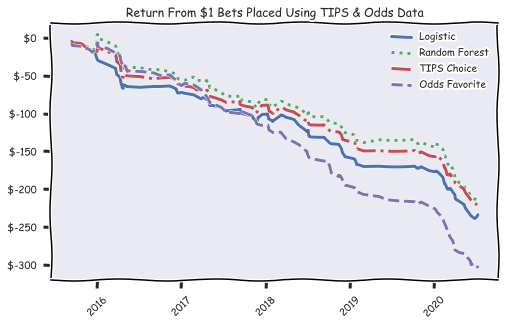

In [145]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

GROUP = df.groupby(['RACE_DATE']).agg({'DOLLAR_RETURN_LG_WIN': 'sum', 'DOLLAR_RETURN_RF_WIN': 'sum', 
                                           'ODDS_EARNINGS': 'sum', 'TIPS_EARNINGS':'sum'}).reset_index()
GROUP

GROUP['TOTAL_LG'] = GROUP.DOLLAR_RETURN_LG_WIN.cumsum()
GROUP['TOTAL_RF'] = GROUP.DOLLAR_RETURN_RF_WIN.cumsum()
GROUP['TOTAL_TIPS'] = GROUP.TIPS_EARNINGS.cumsum()
GROUP['TOTAL_ODDS'] = GROUP.ODDS_EARNINGS.cumsum()

y = GROUP['RACE_DATE']

plt.plot(GROUP.RACE_DATE,GROUP['TOTAL_LG'], label='Logistic', linewidth=3, linestyle='solid')
plt.plot(GROUP.RACE_DATE,GROUP['TOTAL_RF'], label='Random Forest', linewidth=3, linestyle='dotted')
plt.plot(GROUP.RACE_DATE,GROUP['TOTAL_TIPS'], label='TIPS Choice', linewidth=3, linestyle='dashdot')
plt.plot(GROUP.RACE_DATE,GROUP['TOTAL_ODDS'], label='Odds Favorite', linewidth=3, linestyle='--')


formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

plt.gcf().subplots_adjust(bottom=0.23)
plt.legend()
plt.xticks(rotation=45)
plt.title('Return From $1 Bets Placed Using TIPS & Odds Data')

plt.savefig('TIPS_pdf.pdf')

In [147]:
df.loc[df.TIPS_EARNINGS == -1]['TIPS_EARNINGS'].sum()

-587.0

In [148]:
df.loc[df.TIPS_EARNINGS > 0]['TIPS_EARNINGS'].count() 

234

In [149]:
234 / (234 + 587 )

0.2850182704019488

In [151]:
df.loc[df.ODDS_EARNINGS == -1]['ODDS_EARNINGS'].sum()

-586.0

In [152]:
df.loc[df.ODDS_EARNINGS > 0]['ODDS_EARNINGS'].count() 

227

In [153]:
227 / (227 + 586)

0.27921279212792127

In [154]:
df.loc[df.DOLLAR_RETURN_LG_WIN == -1]['DOLLAR_RETURN_LG_WIN'].sum()

-572.0

In [155]:
df.loc[df.DOLLAR_RETURN_LG_WIN > 0]['DOLLAR_RETURN_LG_WIN'].count() 

226